In [50]:
from configs import DataConfig
from configs import ModelConfig
from pipelines import Data
from pipelines import Model

### Prepare data for the model

In [51]:
data_config = DataConfig()
data=Data(config=data_config)
data.load()
(train_images, train_labels), (valid_images, valid_labels), (test_images, test_labels), class_names = data.prepare()

### Define the model

In [52]:
from tensorflow.python.keras.utils.version_utils import callbacks

model_config = ModelConfig(type="resnet50",
                           by="blocks",
                           classes=class_names,
                           convolutional_layers=1,
                           convolutional_filters=[64],
                           convolutional_kernels=[(3, 3)],
                           convolutional_activations=["relu"],
                           pooling_layers=1,
                           pooling_kernels=[(2, 2)],
                           hidden_layers=1,
                           hidden_neurons=[128],
                           hidden_activations=["relu"],
                           callbacks=[callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                           epochs=[10,20],
                           batch_normalization=1,
                           lr=0.45)

### Build model

In [53]:
model=Model(config=model_config)
build_model = model.build()
model.compile()
model.summary()

Total layers in model: 11
Base model trainable : False
Trainable weights    : 10
Non-trainable weights: 322


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (32, 7, 7, 2048)       │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 7, 7, 64)         │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (32, 7, 7, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 3, 3, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (32, 64)               │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (32, 128)              │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (32, 128)              │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (32, 5)                │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,777,157 (94.52 MB)

 Trainable params: 1,189,061 (4.54 MB)

 Non-trainable params: 23,588,096 (89.98 MB)

In [54]:
model.train(((train_images, train_labels),(valid_images, valid_labels)))

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6461 - f1_score: 0.6438 - loss: 2.4067 - precision: 0.6588 - recall: 0.6342 - val_accuracy: 0.6770 - val_f1_score: 0.6729 - val_loss: 8.2458 - val_precision: 0.6770 - val_recall: 0.6770
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7707 - f1_score: 0.7666 - loss: 2.8871 - precision: 0.7730 - recall: 0.7696 - val_accuracy: 0.8403 - val_f1_score: 0.8415 - val_loss: 3.5633 - val_precision: 0.8403 - val_recall: 0.8403
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.8593 - f1_score: 0.8583 - loss: 1.4337 - precision: 0.8615 - recall: 0.8573 - val_accuracy: 0.8439 - val_f1_score: 0.8421 - val_loss: 1.1105 - val_precision: 0.8545 - val_recall: 0.8421
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8828 - f1_score: 0.8830 - loss: 0.6337 - precision: 0.8894 - recall: 0.8817 - val_accuracy: 0.8911 - val_f1_score: 0.8920 - val_loss: 0.4725 - val_precision: 0.8971 - val_recall: 0.8857

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 960ms/step - accuracy: 0.8909 - f1_score: 0.8885 - loss: 0.4261 - precision: 0.8929 - recall: 0.8856
----------------
Loss     : 0.49
Accuracy : 0.90
Recall   : 0.90
Precision: 0.90
F1 score : 0.90
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 938ms/step


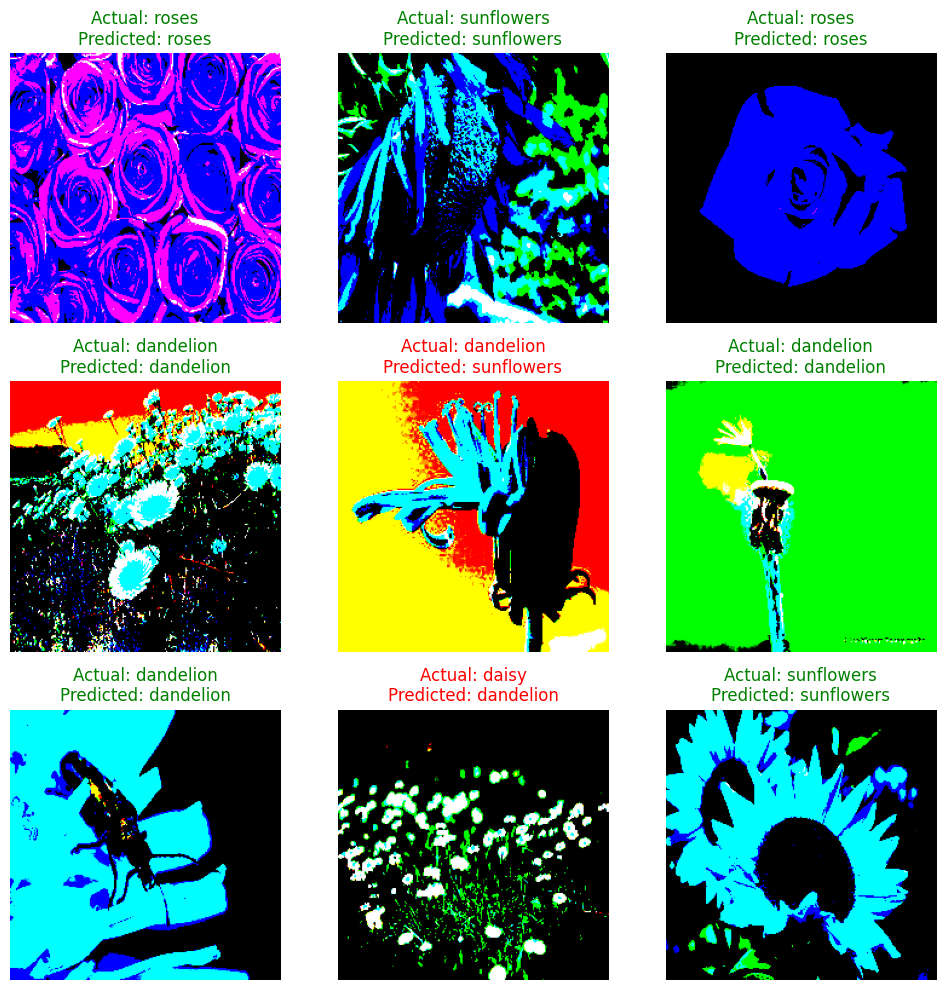

[0.4863962233066559,
 0.8991825580596924,
 0.8964577913284302,
 0.9038461446762085,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.9140271 , 0.8727272 , 0.87692297, 0.9599999 , 0.8648648 ],
       dtype=float32)>]

In [63]:
model.evaluate((test_images, test_labels))

### fine-tune by block

In [56]:
history1=model.finetune(((train_images, train_labels),(valid_images, valid_labels)))

Trainable layers      : ['conv2d_22', 'batch_normalization_44', 'dropout', 'max_pooling2d_22', 'global_average_pooling2d_11', 'dense_33', 'batch_normalization_45', 'dropout_1', 'dense_34', 'conv4_block5_1_conv', 'conv4_block5_1_bn', 'conv4_block5_1_relu', 'conv4_block5_2_conv', 'conv4_block5_2_bn', 'conv4_block5_2_relu', 'conv4_block5_3_conv', 'conv4_block5_3_bn', 'conv4_block5_add', 'conv4_block5_out', 'conv4_block6_1_conv', 'conv4_block6_1_bn', 'conv4_block6_1_relu', 'conv4_block6_2_conv', 'conv4_block6_2_bn', 'conv4_block6_2_relu', 'conv4_block6_3_conv', 'conv4_block6_3_bn', 'conv4_block6_add', 'conv4_block6_out']
Total trainable layers: 29
Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9245 - f1_score: 0.9237 - loss: 0.3035 - precision: 0.9342 - recall: 0.9191 - val_accuracy: 0.8838 - val_f1_score: 0.8858 - val_loss: 0.4015 - val_precision: 0.8961 - val_recall: 0.8766
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9144 - f1_score: 0.9135 - loss: 

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 919ms/step - accuracy: 0.8878 - f1_score: 0.8725 - loss: 0.3581 - precision: 0.8992 - recall: 0.8749
----------------
Loss     : 0.35
Accuracy : 0.91
Recall   : 0.89
Precision: 0.92
F1 score : 0.90
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 985ms/step


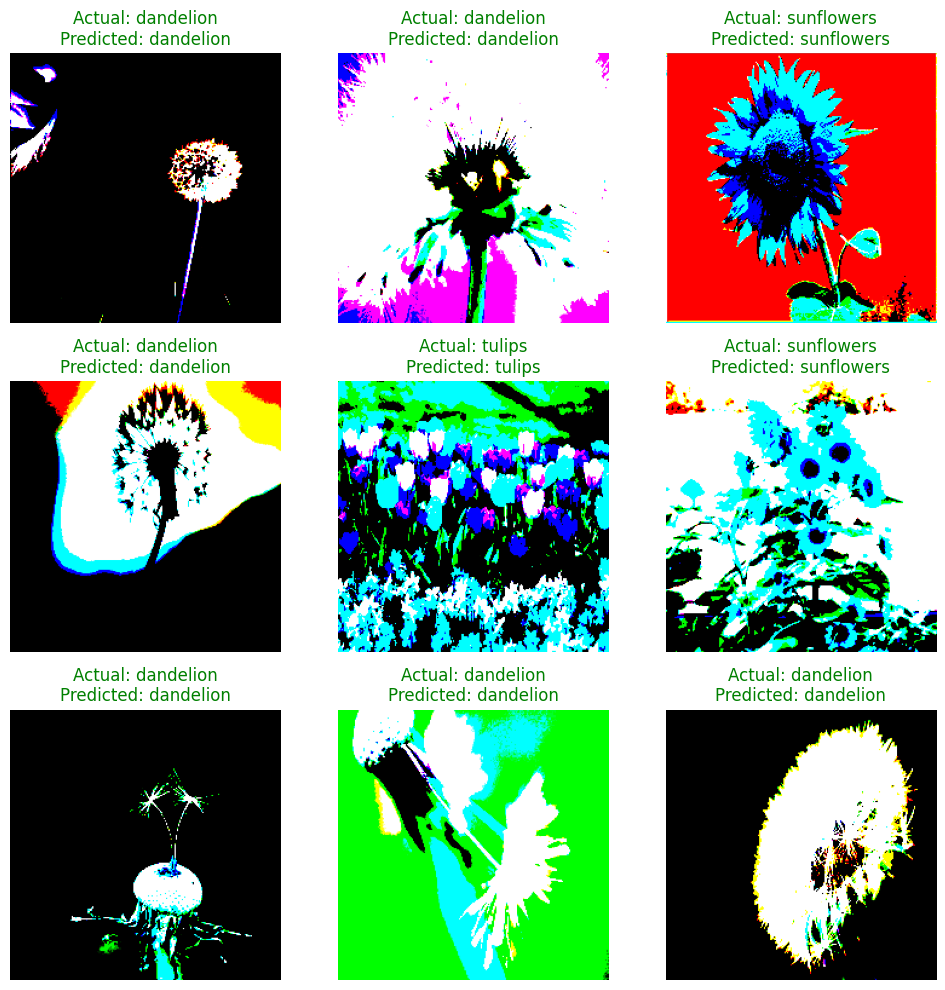

[0.3537701964378357,
 0.9073569774627686,
 0.8937329649925232,
 0.916201114654541,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.94883716, 0.8793103 , 0.86713284, 0.9523809 , 0.8656716 ],
       dtype=float32)>]

In [57]:
model.evaluate((test_images, test_labels))

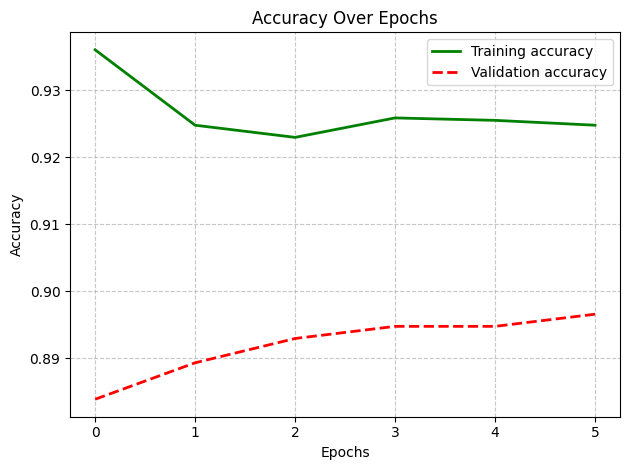

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 891ms/step


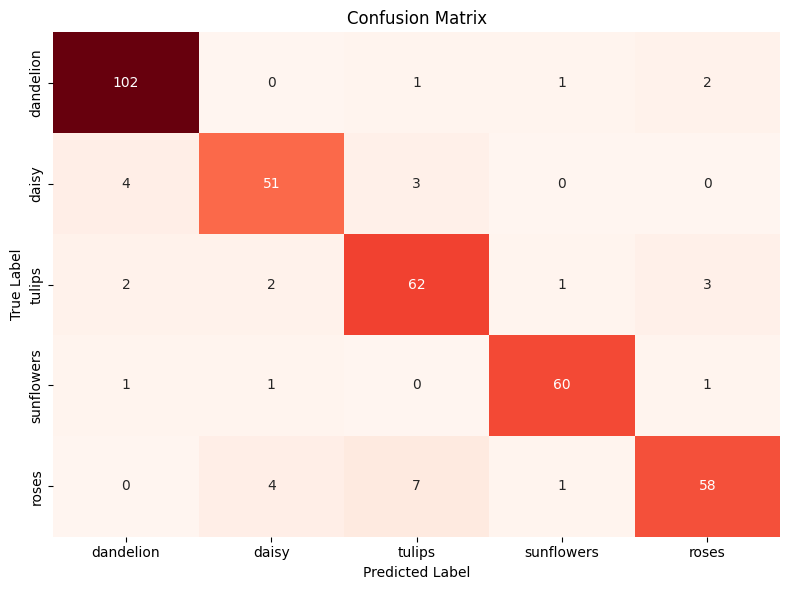

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 882ms/step


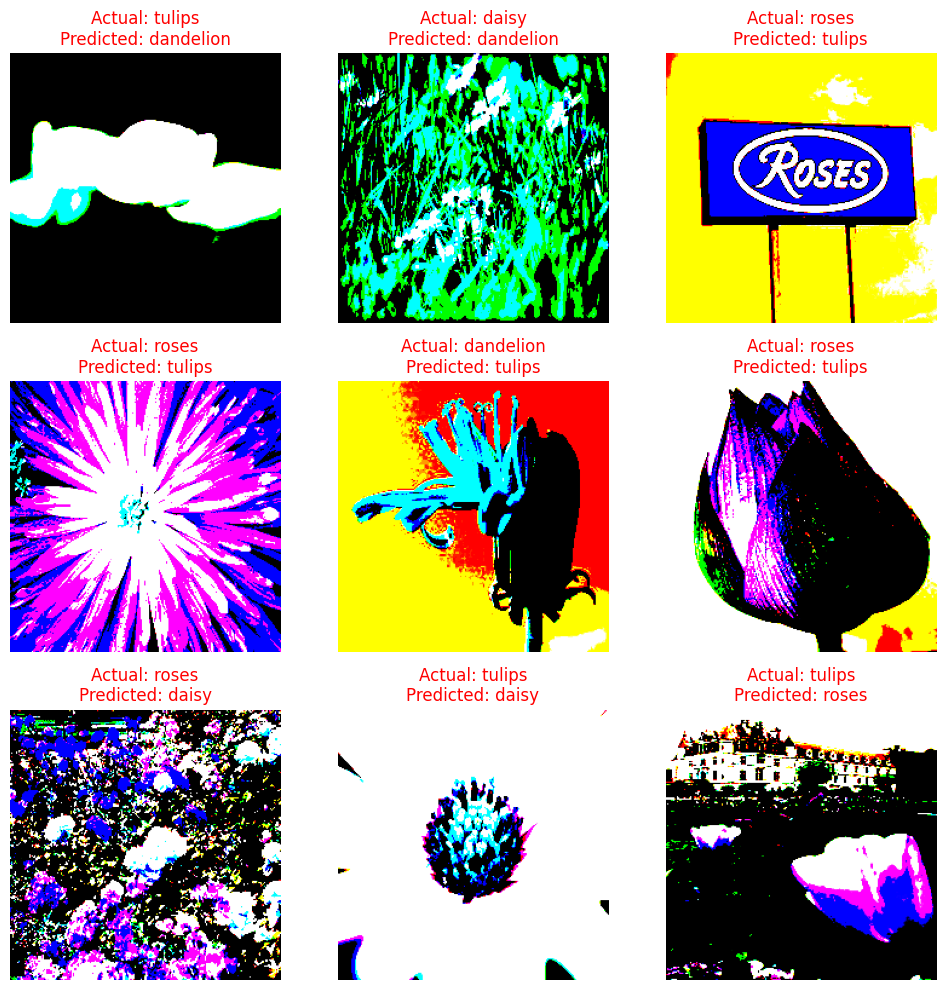

In [58]:
model.visualize_performance(history1,"accuracy")
model.visualize_confusion_matrix((test_images, test_labels))
model.visualize_misclassifications((test_images, test_labels))

### fine-tune by layers

In [59]:
model_config.by="layers"
model=Model(config=model_config)
model.build()
model.compile()

Total layers in model: 11
Base model trainable : False
Trainable weights    : 10
Non-trainable weights: 322


In [60]:
history2 = model.finetune(((train_images, train_labels),(valid_images, valid_labels)))

Trainable layers      : ['input_layer_25', 'conv2d_23', 'batch_normalization_46', 'dropout_2', 'max_pooling2d_23', 'global_average_pooling2d_12', 'dense_35', 'batch_normalization_47', 'dropout_3', 'dense_36']
Total trainable layers: 10
Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6225 - f1_score: 0.6179 - loss: 1.8433 - precision: 0.6519 - recall: 0.6104 - val_accuracy: 0.6915 - val_f1_score: 0.6865 - val_loss: 5.1533 - val_precision: 0.6922 - val_recall: 0.6897
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7573 - f1_score: 0.7555 - loss: 1.8385 - precision: 0.7620 - recall: 0.7543 - val_accuracy: 0.8348 - val_f1_score: 0.8344 - val_loss: 2.1557 - val_precision: 0.8361 - val_recall: 0.8330
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8155 - f1_score: 0.8113 - loss: 1.4504 - precision: 0.8173 - recall: 0.8149 - val_accuracy: 0.8403 - val_f1_score: 0.8407 - val_loss: 1.1389 - val_precision: 0.8449 - val_recall: 0.8403
Epoch 4/20
86

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 936ms/step - accuracy: 0.8909 - f1_score: 0.8885 - loss: 0.4261 - precision: 0.8929 - recall: 0.8856
----------------
Loss     : 0.49
Accuracy : 0.90
Recall   : 0.90
Precision: 0.90
F1 score : 0.90
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


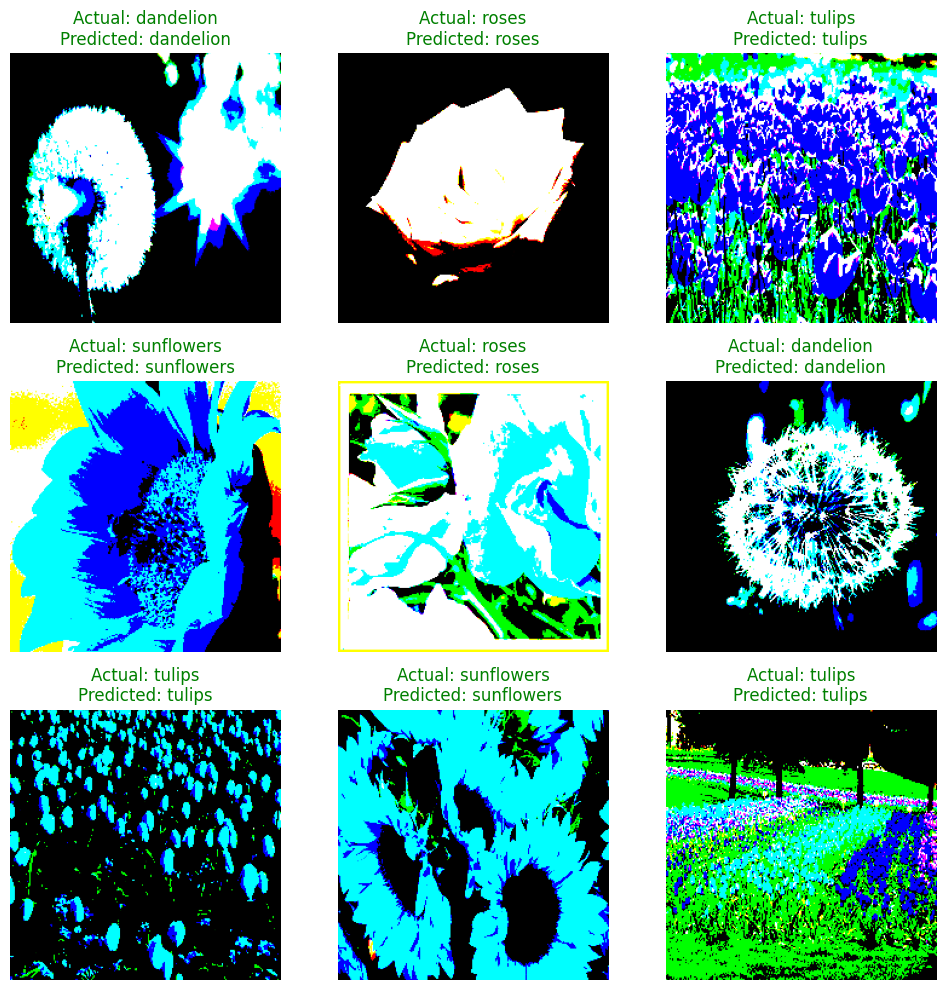

[0.4863962233066559,
 0.8991825580596924,
 0.8964577913284302,
 0.9038461446762085,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.9140271 , 0.8727272 , 0.87692297, 0.9599999 , 0.8648648 ],
       dtype=float32)>]

In [61]:
model.evaluate((test_images, test_labels))

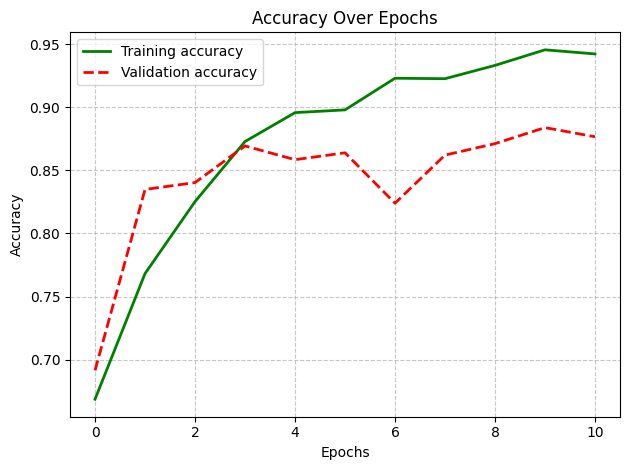

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


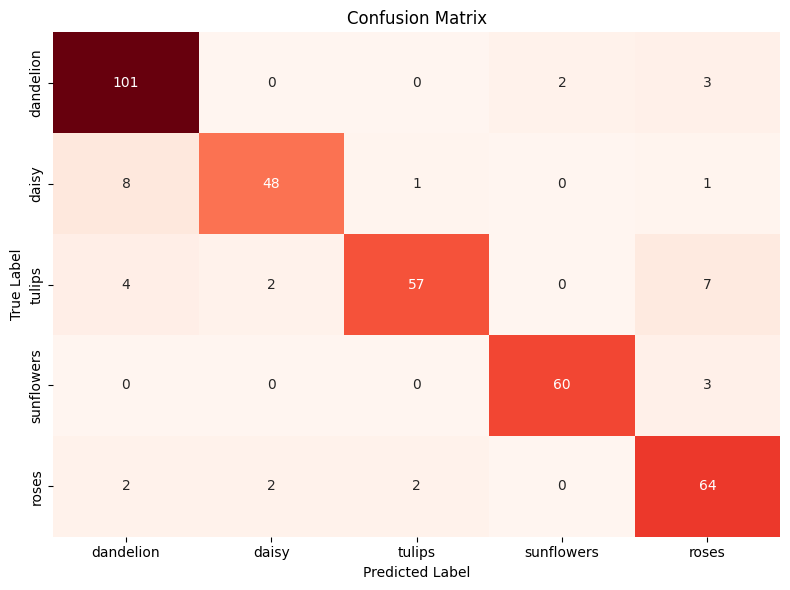

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 937ms/step


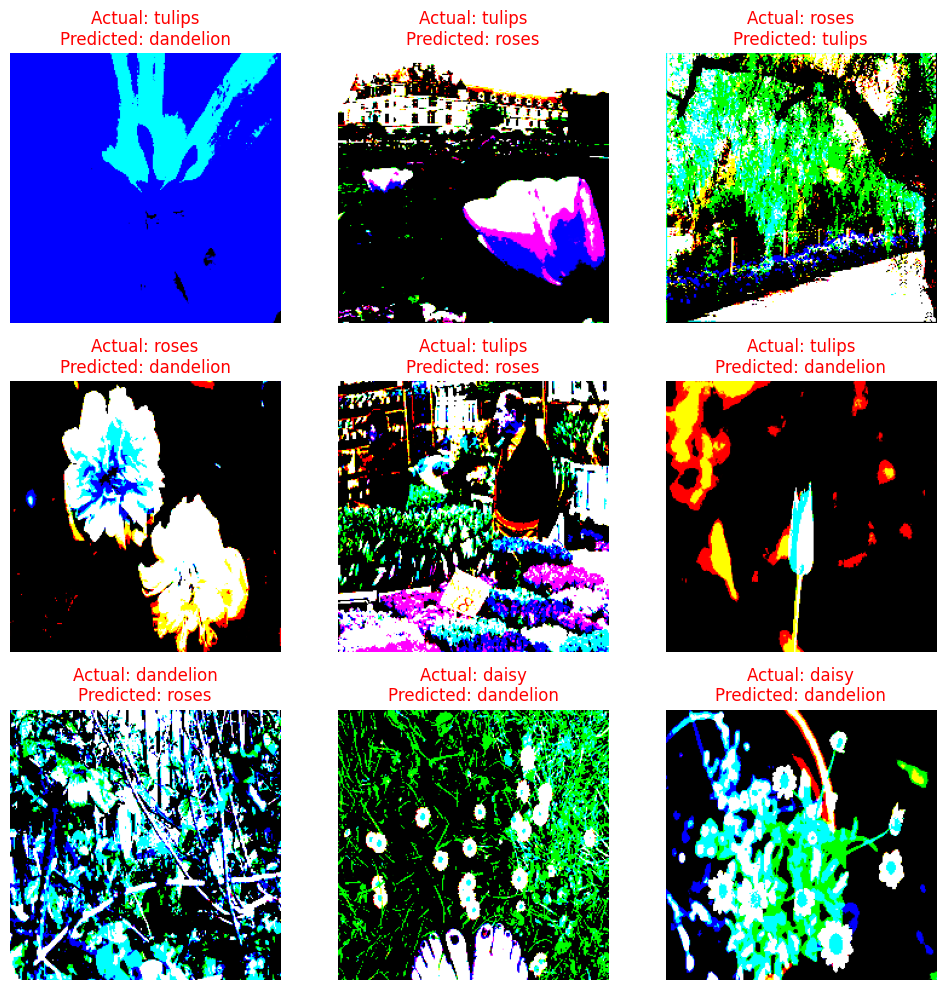

In [62]:
model.visualize_performance(history2,"accuracy")
model.visualize_confusion_matrix((test_images, test_labels))
model.visualize_misclassifications((test_images, test_labels))